## House Price Prediction

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

## Data Understanding and Exploration

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
house = pd.read_csv('train.csv')

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.shape

(1460, 81)

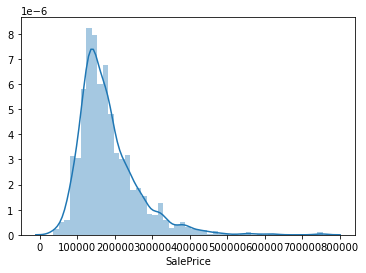

In [7]:
# Lets introspect the distribution of Target variable
sns.distplot(house['SalePrice'])
plt.show()

From the above distibution we can see that the graph is right-skewed

In [8]:
# Lets check the skewness of the Target variable
house['SalePrice'].skew()

1.8828757597682129

As per rules, if skewness is less than -1 and greater than 1 then the distribution is highly skewed. And for acceptable skewness it should be between -0.5 and 0.5.

In our case, skew value is 1.88 which is highly skewed.

In [9]:
# Now, lets check the kurtosis
house['SalePrice'].kurt()

6.536281860064529

Kurtosis must be between -3 and 3.

### Bivariate analysis

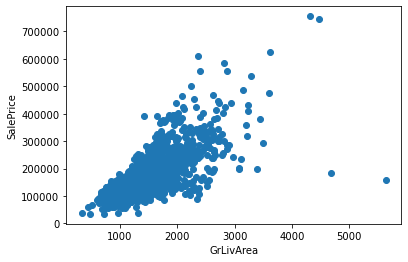

In [10]:
# ScatterPlot
plt.scatter(x=house['GrLivArea'], y=house['SalePrice'])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

From the above graph we can see that both 'GrLivArea' & 'SalePrice' have at least 2 outliers each. 'SalePrice' at >700000 & 'GrLivArea' at >4000.

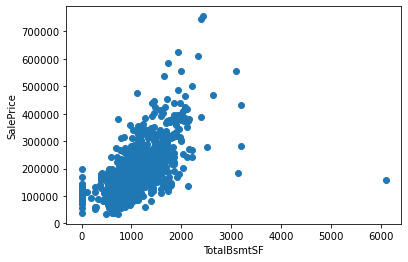

In [11]:
plt.scatter(x=house['TotalBsmtSF'], y=house['SalePrice'])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

From the above graph we can see that both 'TotalBsmtSF' & 'SalePrice' have at least 2 outliers each. 'SalePrice' at >700000 & 'TotalBsmtSF' at >4000.

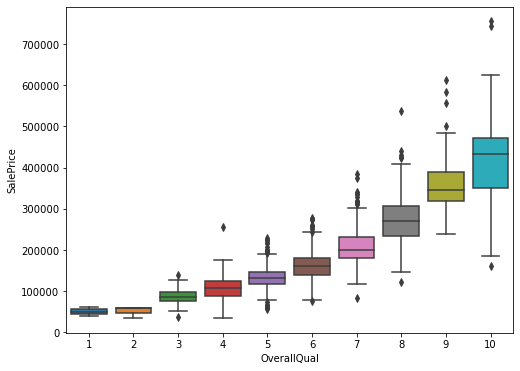

In [12]:
# Boxplot
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=house['OverallQual'], y=house['SalePrice'])
plt.show()

From the above graph we can see that OverallQual has some upper and lower outliers.

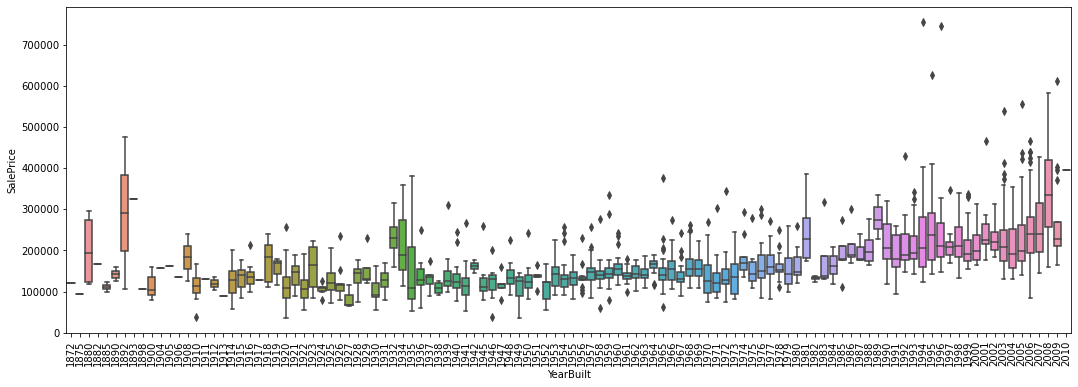

In [13]:
f, ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x=house['YearBuilt'], y=house['SalePrice'])
plt.xticks(rotation=90)
plt.show()

From the above graph we can see that years 1992, 1994, 1995 and above have farthest outliers.

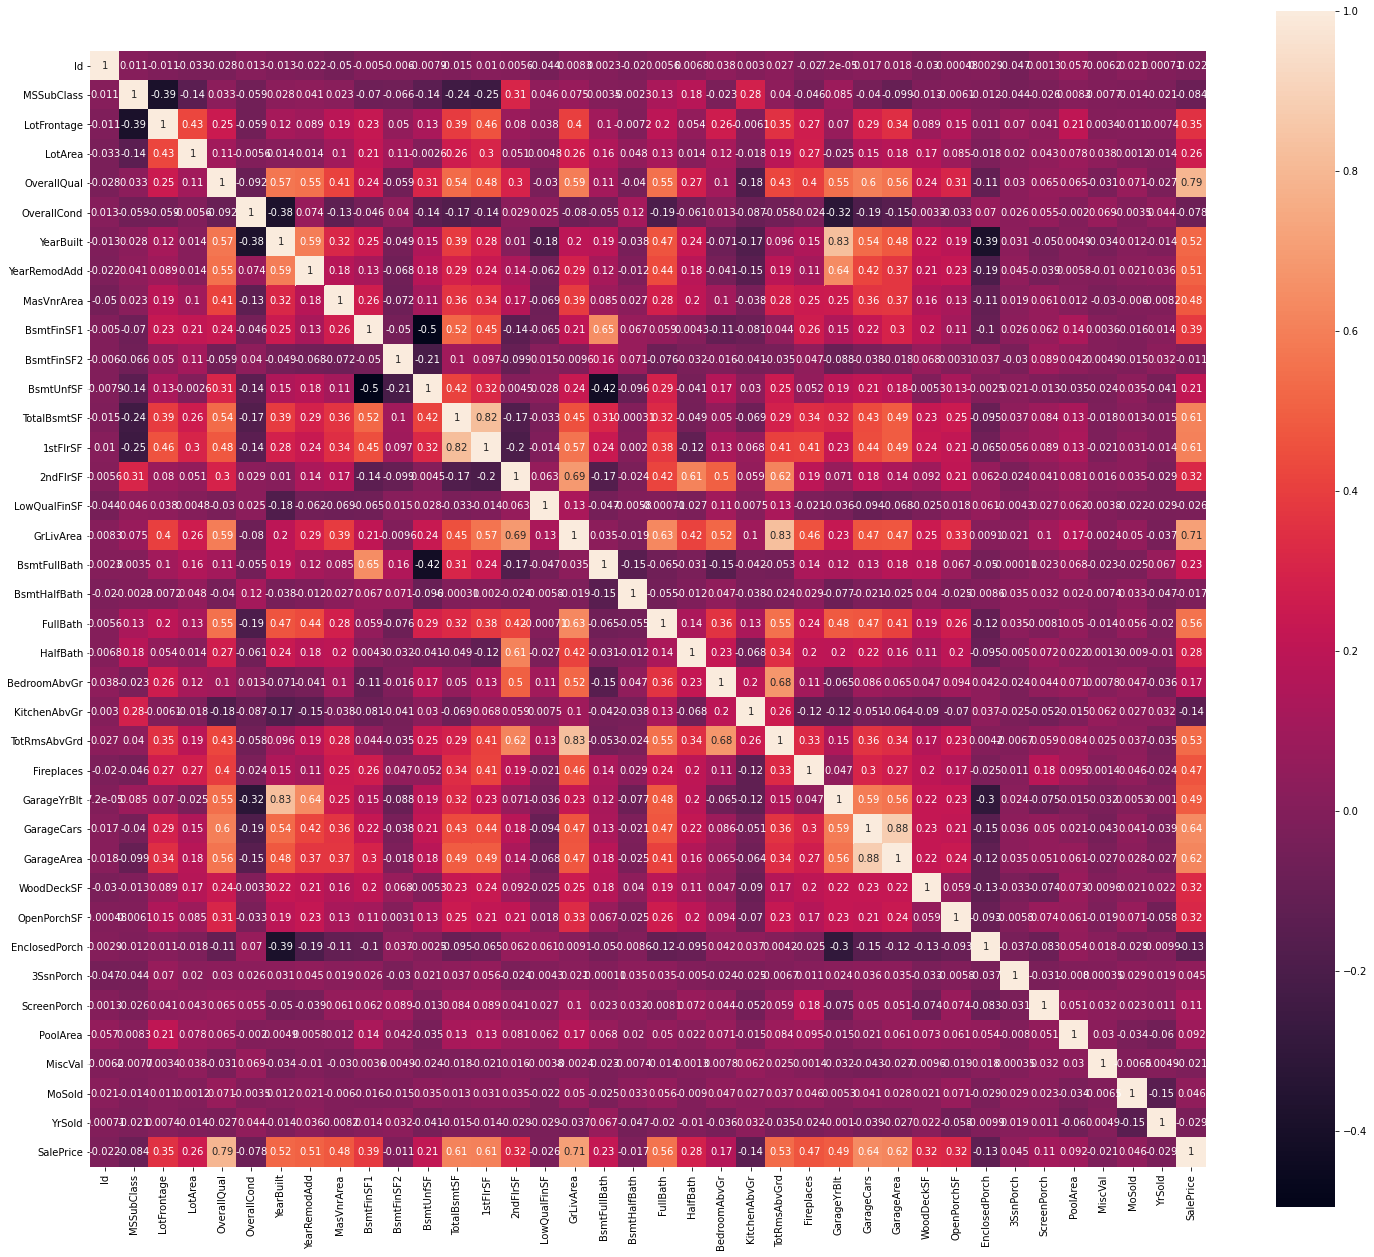

In [14]:
# Correlation Matrix
corrmat = house.corr()
f, ax = plt.subplots(figsize=(25,22))
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

From the above heatmap we can see that following are highly correlated to each other:
    1. 1stFlrSF - TotalBsmtSF
    2. GarageYrBlt - YearBuilt
    3. TotRmsAbvGrd - GrLivArea
    4. GarageArea - GarageCars
We need to drop these.

In [15]:
# Lets drop correlated variables and check the correlation again
house = house.drop('GarageYrBlt', axis=1)
house = house.drop('1stFlrSF', axis=1)
house = house.drop('TotRmsAbvGrd', axis=1)
house = house.drop('GarageArea', axis=1)

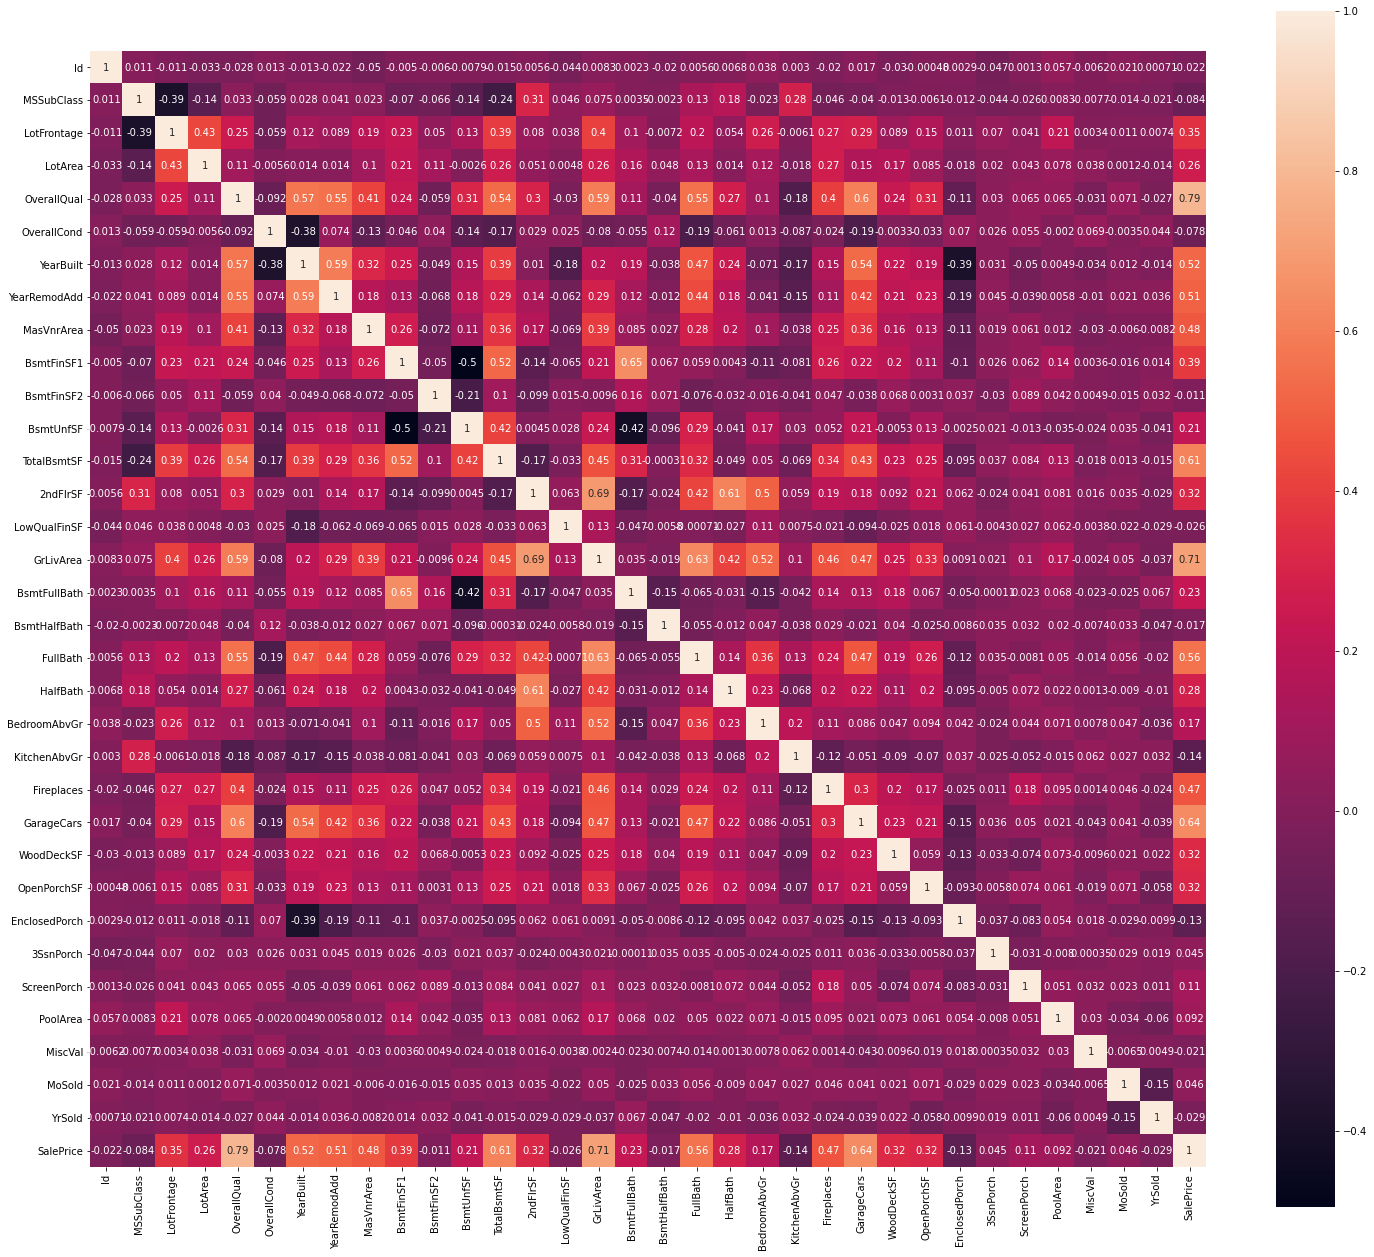

In [16]:
# Correlation Matrix again
corrmat = house.corr()
f, ax = plt.subplots(figsize=(25,22))
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

Now, it looks good and we can proceed further.

In [17]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPor

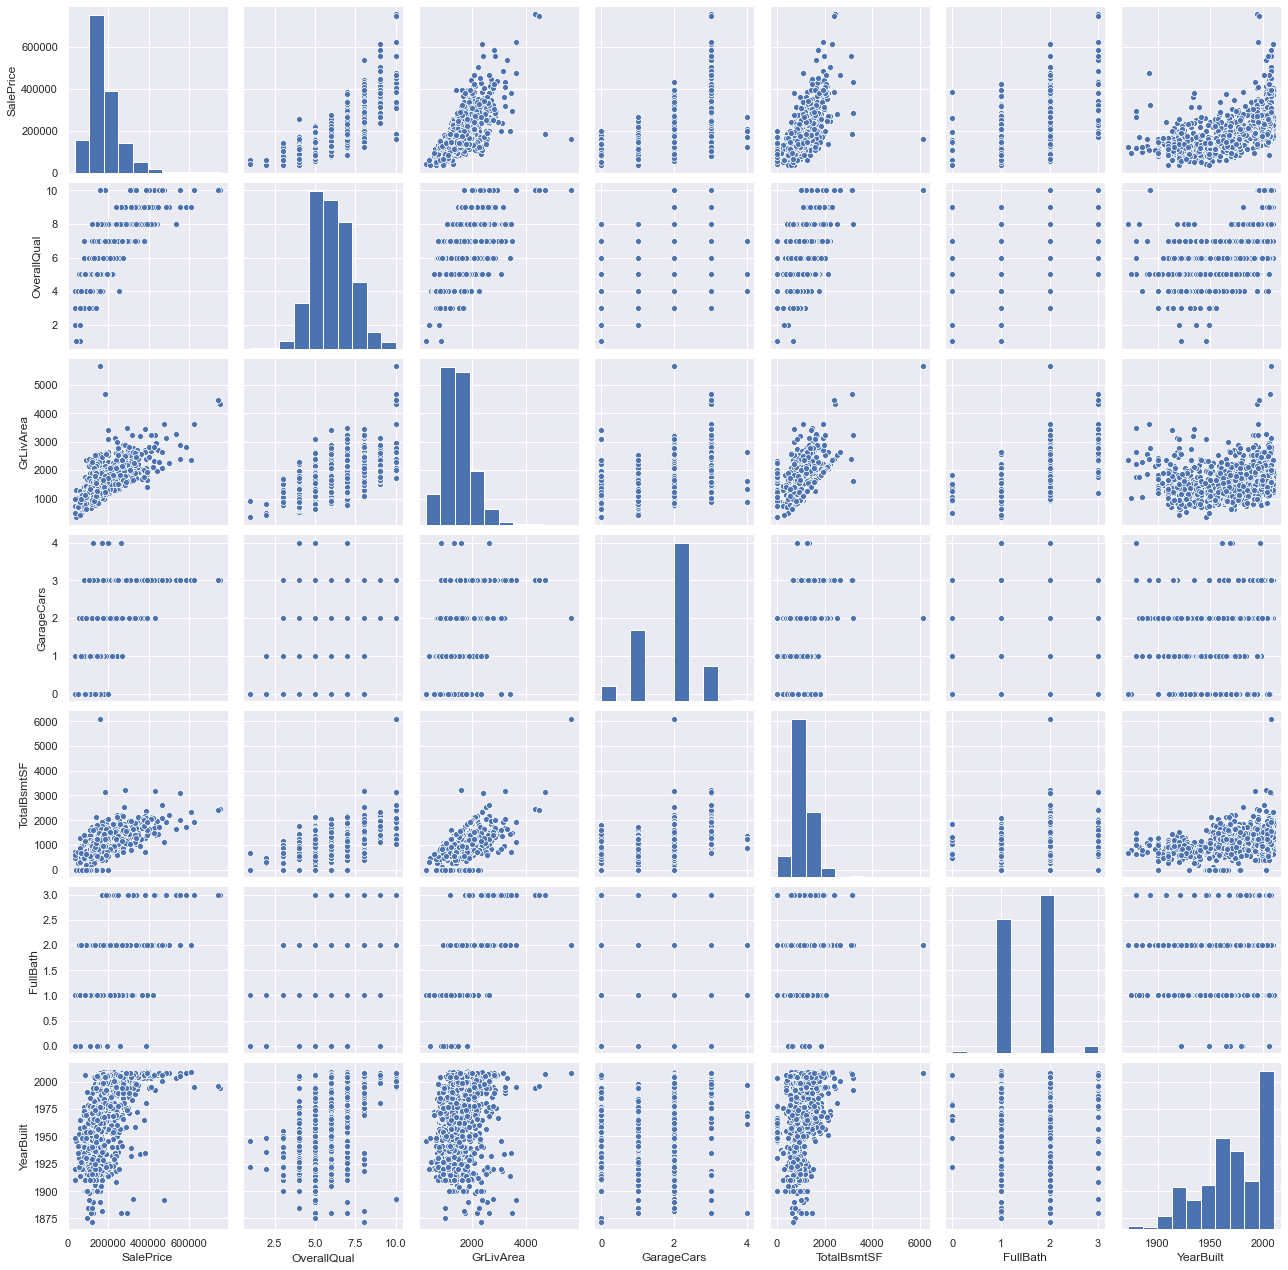

In [18]:
# Pair Plots
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size=2.5)
plt.show()

From the above pairplots, we can infer that:
    1. GrLivArea - SalePrice has some outliers
    2. TotalBsmtSf has outliers with SalePrice, OverallQual, GrLivArea, YearBuilt, FullBath and GarageCars

### We saw from Data Exploration that many columns have outliers but we are not treating them as these values can be important for analysis.

## Missing Data

In [19]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
HeatingQC,0,0.000000
Heating,0,0.000000
SaleCondition,0,0.000000
BsmtUnfSF,0,0.000000


In [20]:
missing_data = missing_data[missing_data['Total']>0]
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [21]:
NA_means_data = missing_data.iloc[0:, 0:0]
NA_means_data.head()

""
PoolQC
MiscFeature
Alley
Fence
FireplaceQu


In [22]:
# Lets replace NA with None
for i in NA_means_data:
    house[i].fillna('None', method='ffill', inplace=True)

In [23]:
types_train = house.dtypes
types_train

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [24]:
num_train = types_train[(types_train == 'int64') | (types_train == 'float64')]
num_train

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
Fireplaces         int64
GarageCars         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [25]:
cat_train = types_train[types_train == 'object']
cat_train

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [26]:
# Lets convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)
numerical_values_train

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
# same with cat_train
categorical_values_train = list(cat_train.index)
categorical_values_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Data Preparation

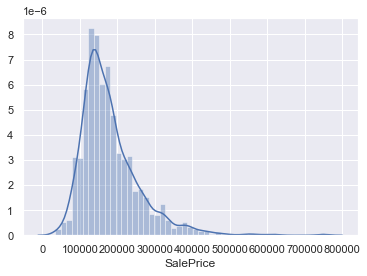

In [28]:
sns.distplot(house['SalePrice'])
plt.show()

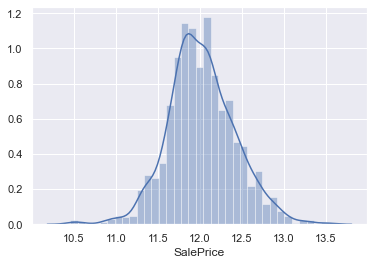

In [29]:
sns.distplot(np.log(house['SalePrice']))
plt.show()

Since, 'SalePrice' has skewed data and we just saw converting it to log fixes it and makes it normal distribution. Hence, we need to convert it to log.

In [30]:
house['TransformedSalePrice'] = np.log(house['SalePrice'])

In [31]:
# Categorical values encoding
for i in categorical_values_train:
    feature_set = set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i] == j,i] = feature_list.index(j)

In [32]:
cols = house.columns

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

imputer = imputer.fit(house[cols])    
house[cols] = imputer.transform(house[cols])

## Model Building

In [34]:
X = house.drop(['Id', 'SalePrice', 'TransformedSalePrice'], axis=1).values
y = house['TransformedSalePrice'].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [36]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1022
Model:                            GLM   Df Residuals:                      947
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Apr 2021   Deviance:                   8.7320e+05
Time:                        16:50:45   Pearson chi2:                 5.60e+20
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.447e+16   3.39e+09   2.79e+07      0.000    9.45e+16    9.45e+16
x1         -8.006e+12   1.53e+05  -5.25e+07      0.000   -8.01e+12   -8.01e+12
x2         -4.627e+14   4.98e+06  -9.28e+07      0.000   -4.63e+14   -4.63e+14
x3          7.734e+10   1.37e+05   5.64e+05      0.000    7.73e+10    7.73e+10
x4          1.068e+10    251.875   4.24e+07      0.000    1.07e+10    1.07e+10
x5          1.251e+15   3.76e+07   3.33e+07      0.000    1.25e+15    1.25e+15
x6           2.07e+14   1.91e+07   1.08e+07      0.000    2.07e+14    2.07e+14
x7          1.441e+13   2.51e+06   5.73e+06      0.000    1.44e+13    1.44e+13
x8          9.496e+13   4.92e+06   1.93e+07      0.000     9.5e+13     9.5e+13
x9          1.653e+15   7.17e+07   2.31e+07      0.000    1.65e+15    1.65e+15
x10        -4.063e+13   1.82e+06  -2.23e+07      0.000   -4.06e+13   -4.06e+13
x11        -1.378e+14   5.49e+06  -2.51e+07      0.000   -1.38e+14   -1.38e+14
x12         -6.77e+12   3.76e+05   -1.8e+07      0.000   -6.77e+12   -6.77e+12
x13         1.193e+14   2.01e+06   5.94e+07      0.000    1.19e+14    1.19e+14
x14        -5.895e+14   9.33e+06  -6.32e+07      0.000   -5.89e+14   -5.89e+14
x15         1.994e+14   5.84e+06   3.41e+07      0.000    1.99e+14    1.99e+14
x16          3.65e+13   1.26e+06   2.89e+07      0.000    3.65e+13    3.65e+13
x17         4.913e+14   2.91e+06   1.69e+08      0.000    4.91e+14    4.91e+14
x18         3.107e+14    2.7e+06   1.15e+08      0.000    3.11e+14    3.11e+14
x19         1.323e+13   1.91e+05   6.94e+07      0.000    1.32e+13    1.32e+13
x20         9.403e+12   1.67e+05   5.62e+07      0.000     9.4e+12     9.4e+12
x21         5.685e+12   2.92e+06   1.95e+06      0.000    5.68e+12    5.68e+12
x22         4.741e+13   6.53e+06   7.26e+06      0.000    4.74e+13    4.74e+13
x23         1.798e+13   1.02e+06   1.76e+07      0.000     1.8e+13     1.8e+13
x24        -2.405e+13   9.41e+05  -2.56e+07      0.000    -2.4e+13    -2.4e+13
x25          8.42e+12   3.86e+06   2.18e+06      0.000    8.42e+12    8.42e+12
x26         2.422e+11   1.47e+04   1.64e+07      0.000    2.42e+11    2.42e+11
x27        -9.492e+13   5.22e+06  -1.82e+07      0.000   -9.49e+13   -9.49e+13
x28        -4.505e+13   2.48e+06  -1.82e+07      0.000   -4.51e+13   -4.51e+13
x29        -2.959e+13   2.16e+06  -1.37e+07      0.000   -2.96e+13   -2.96e+13
x30        -3.849e+13   2.25e+06  -1.71e+07      0.000   -3.85e+13   -3.85e+13
x31        -8.026e+13   4.87e+06  -1.65e+07      0.000   -8.03e+13   -8.03e+13
x32         1.027e+14    2.6e+06   3.95e+07      0.000    1.03e+14    1.03e+14
x33         3.456e+13   1.67e+06   2.07e+07      0.000    3.46e+13    3.46e+13
x34         2.637e+11   6285.758   4.19e+07      0.000    2.64e+11    2.64e+11
x35         1.015e+14    4.1e+06   2.48e+07      0.000    1.01e+14    1.01e+14
x3

As per assignment, we do not have to look at the Linear Regression. So, lets proceed with Lasso and Ridge.

In [37]:
# List of alphas
params = {
    'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]
}
print(params)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}


In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

### Lasso

In [39]:
# Lasso
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005187,1.168604e-03,0.000399,4.885192e-04,0.0001,{'alpha': 0.0001},-0.095681,-0.096963,-0.106206,-0.090707,...,-0.096181,0.005562,2,-0.082464,-0.081745,-0.079428,-0.087559,-0.086952,-0.083630,0.003132
1,0.003789,1.163342e-03,0.000399,4.888112e-04,0.001,{'alpha': 0.001},-0.095367,-0.098429,-0.103377,-0.088678,...,-0.095376,0.005236,1,-0.084827,-0.081738,-0.081083,-0.089038,-0.088349,-0.085007,0.003272
2,0.002394,4.885193e-04,0.000000,0.000000e+00,0.01,{'alpha': 0.01},-0.096403,-0.105306,-0.106151,-0.087244,...,-0.097668,0.007214,3,-0.095223,-0.086588,-0.089990,-0.096807,-0.095428,-0.092807,0.003881
3,0.001995,2.780415e-07,0.000997,1.784161e-07,0.05,{'alpha': 0.05},-0.108319,-0.123244,-0.120928,-0.106937,...,-0.113583,0.007001,4,-0.111324,-0.104924,-0.108714,-0.112646,-0.111856,-0.109893,0.002813
4,0.003191,7.465313e-04,0.000000,0.000000e+00,0.1,{'alpha': 0.1},-0.116494,-0.133672,-0.130340,-0.120188,...,-0.123914,0.006795,7,-0.123805,-0.112828,-0.118483,-0.123034,-0.123060,-0.120242,0.004159


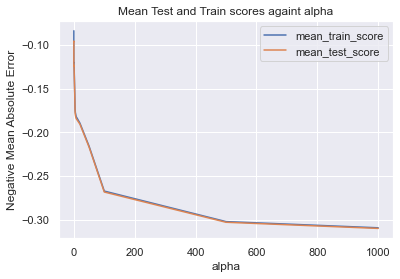

In [41]:
# Plot mean test and train scores against alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Mean Test and Train scores againt alpha')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

In [42]:
alpha = 500

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [43]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.84696671e-06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [44]:
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

In [45]:
lasso_pred = pd.DataFrame(y_train, columns=['y_train'])
lasso_pred['y_pred_train'] = pd.DataFrame(y_pred_train_l)
lasso_pred['y_test'] = pd.DataFrame(y_test)
lasso_pred['y_pred_test'] = pd.DataFrame(y_pred_test_l)
lasso_pred

,y_train,y_pred_train,y_test,y_pred_test
0,11.492723,11.999002,11.699405,12.015462
1,12.468437,12.019825,12.188418,12.028283
2,11.635143,12.014207,12.078239,12.010010
3,11.669929,11.997577,12.271392,12.016650
4,11.715866,12.026804,12.049419,12.019728
...,...,...,...,...
1017,12.149502,12.011580,NaN,NaN
1018,12.860999,12.215502,NaN,NaN
1019,12.669998,12.009743,NaN,NaN
1020,11.608236,12.022442,NaN,NaN


In [46]:
importance_l = np.abs(lasso.coef_)
feature_names = np.array(house.drop(['Id', 'SalePrice', 'TransformedSalePrice'], axis=1).columns)

In [47]:
feature_selected = pd.DataFrame(importance_l, columns=['importance'])
feature_selected['feature_names'] = pd.DataFrame(feature_names)
feature_selected.sort_values('importance', ascending=False).head(10)

,importance,feature_names
3,0.000005,LotArea
0,0.000000,MSSubClass
47,0.000000,FullBath
54,0.000000,FireplaceQu
53,0.000000,Fireplaces
52,0.000000,Functional
51,0.000000,KitchenQual
50,0.000000,KitchenAbvGr
49,0.000000,BedroomAbvGr
48,0.000000,HalfBath


These are the top 10 features selected by the Lasso model. And the optimal value of lambda for lasso is 500.

### Ridge

In [48]:
# Ridge
ridge = Ridge()
folds = 5
model_cv_r = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv_r.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
cv_results_r = pd.DataFrame(model_cv_r.cv_results_)
cv_results_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001593,0.000800,0.000199,0.000399,0.0001,{'alpha': 0.0001},-0.095793,-0.096731,-0.107169,-0.091043,...,-0.096677,0.005637,5,-0.082291,-0.081794,-0.079208,-0.087546,-0.086794,-0.083526,0.003163
1,0.001197,0.000399,0.000200,0.000399,0.001,{'alpha': 0.001},-0.095793,-0.096731,-0.107170,-0.091045,...,-0.096676,0.005637,4,-0.082294,-0.081794,-0.079209,-0.087547,-0.086795,-0.083528,0.003163
2,0.000798,0.000399,0.000200,0.000399,0.01,{'alpha': 0.01},-0.095787,-0.096736,-0.107181,-0.091063,...,-0.096676,0.005642,3,-0.082321,-0.081794,-0.079222,-0.087558,-0.086806,-0.083540,0.003162
3,0.000997,0.000631,0.000399,0.000489,0.05,{'alpha': 0.05},-0.095765,-0.096756,-0.107230,-0.091141,...,-0.096679,0.005662,6,-0.082442,-0.081794,-0.079276,-0.087609,-0.086853,-0.083595,0.003161
4,0.000798,0.000399,0.000200,0.000399,0.1,{'alpha': 0.1},-0.095755,-0.096779,-0.107288,-0.091234,...,-0.096686,0.005685,7,-0.082589,-0.081794,-0.079343,-0.087671,-0.086909,-0.083661,0.003159


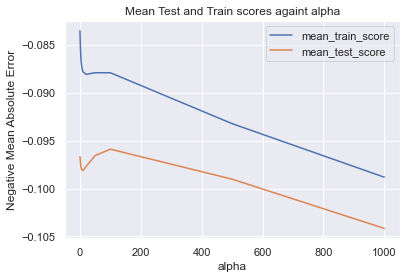

In [50]:
# Plot mean test and train scores against alpha
cv_results_r['param_alpha'] = cv_results_r['param_alpha'].astype('float64')

# Plotting
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_train_score'])
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Mean Test and Train scores againt alpha')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

In [51]:
alpha = 100

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [52]:
ridge.coef_

array([-1.12745225e-03, -5.48623616e-02, -2.67854882e-04,  1.38875684e-06,
        5.79840812e-03,  4.71618254e-03,  7.65014413e-03,  2.19795068e-02,
        1.91444808e-03, -4.58100077e-03, -1.30776911e-02, -8.76454922e-04,
        1.19139853e-02, -3.07066749e-02,  1.94881985e-02,  2.43647126e-03,
        7.19905751e-02,  3.75541910e-02,  2.20509946e-03,  1.60432856e-03,
       -1.81842656e-03,  9.16116254e-03,  1.60039709e-03, -2.29836823e-03,
        2.58152496e-03,  1.24036803e-05, -1.14433725e-02, -4.15644061e-03,
       -2.98670383e-03, -5.18094707e-03, -7.76593926e-03,  1.63728427e-02,
        8.30513629e-03,  2.78766687e-05,  8.23414755e-03,  1.68666234e-05,
        5.46952067e-06,  5.02128126e-05, -7.45169437e-03, -3.95692001e-03,
       -1.77144294e-02,  6.12244821e-03,  6.24959589e-06, -1.26065247e-05,
        2.41576486e-04,  3.81081618e-02,  4.53528443e-03,  1.49514651e-02,
        5.17054782e-03,  1.01989707e-02, -9.82353512e-03,  1.06096558e-02,
        6.86005042e-03,  

In [53]:
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

In [54]:
ridge_pred = pd.DataFrame(y_train, columns=['y_train'])
ridge_pred['y_pred_train'] = pd.DataFrame(y_pred_train_r)
ridge_pred['y_test'] = pd.DataFrame(y_test)
ridge_pred['y_pred_test'] = pd.DataFrame(y_pred_test_r)
ridge_pred

,y_train,y_pred_train,y_test,y_pred_test
0,11.492723,11.504208,11.699405,11.663267
1,12.468437,12.696401,12.188418,12.156553
2,11.635143,11.708055,12.078239,12.103175
3,11.669929,11.817671,12.271392,12.245512
4,11.715866,11.612998,12.049419,11.501944
...,...,...,...,...
1017,12.149502,12.228021,NaN,NaN
1018,12.860999,12.779598,NaN,NaN
1019,12.669998,12.470432,NaN,NaN
1020,11.608236,11.600950,NaN,NaN


In [55]:
importance_r = np.abs(ridge.coef_)

In [56]:
feature_selected_r = pd.DataFrame(importance_r, columns=['importance'])
feature_selected_r['feature_names'] = pd.DataFrame(feature_names)
feature_selected_r.sort_values('importance', ascending=False).head(10)

,importance,feature_names
16,0.071991,OverallQual
1,0.054862,MSZoning
57,0.053736,GarageCars
45,0.038108,BsmtFullBath
17,0.037554,OverallCond
53,0.035029,Fireplaces
13,0.030707,Condition2
67,0.023609,PoolQC
7,0.021980,LandContour
14,0.019488,BldgType


These are the top 10 features selected by Ridge model. And the optimal value of lambda for ridge is 100.

## Question 1: If we double the lamda value of both Ridge and Lasso.

### Ridge

In [57]:
alpha = 200

ridge1 = Ridge(alpha=alpha)
ridge1.fit(X_train, y_train)

Ridge(alpha=200)

In [58]:
ridge1.coef_

array([-1.00245085e-03, -4.27643077e-02, -2.43797819e-04,  1.55252235e-06,
        3.18946162e-03,  3.17247095e-03,  7.61529839e-03,  1.74628939e-02,
        9.15159737e-04, -4.17954145e-03, -8.97630075e-03, -1.01160640e-03,
        1.03424988e-02, -1.95172219e-02,  1.29219956e-02,  2.19437575e-03,
        6.55988259e-02,  3.45063183e-02,  2.52400212e-03,  1.79184798e-03,
       -1.98031568e-03,  7.40604759e-03,  1.63778962e-03, -2.08505477e-03,
        1.83362745e-03,  1.66285982e-05, -8.46856701e-03, -3.78105263e-03,
       -3.95416475e-03, -4.14561932e-03, -5.33565738e-03,  1.50049333e-02,
        8.42264186e-03,  3.18380906e-05,  6.09434204e-03,  2.36358017e-05,
        1.64432497e-06,  5.71182173e-05, -4.05219478e-03, -4.00947485e-03,
       -1.30481848e-02,  7.37205957e-03,  1.72512655e-06, -3.46469874e-05,
        2.58246392e-04,  2.65604743e-02,  2.58642768e-03,  1.02796015e-02,
        3.56543861e-03,  6.52293964e-03, -6.99780504e-03,  8.18095494e-03,
        7.47428664e-03,  

In [59]:
y_pred_train_r1 = ridge1.predict(X_train)
y_pred_test_r1 = ridge1.predict(X_test)

In [60]:
ridge_pred1 = pd.DataFrame(y_train, columns=['y_train'])
ridge_pred1['y_pred_train'] = pd.DataFrame(y_pred_train_r1)
ridge_pred1['y_test'] = pd.DataFrame(y_test)
ridge_pred1['y_pred_test'] = pd.DataFrame(y_pred_test_r1)
ridge_pred1

,y_train,y_pred_train,y_test,y_pred_test
0,11.492723,11.492158,11.699405,11.672576
1,12.468437,12.687613,12.188418,12.164683
2,11.635143,11.696347,12.078239,12.104616
3,11.669929,11.831562,12.271392,12.253799
4,11.715866,11.608224,12.049419,11.482189
...,...,...,...,...
1017,12.149502,12.217398,NaN,NaN
1018,12.860999,12.769681,NaN,NaN
1019,12.669998,12.466740,NaN,NaN
1020,11.608236,11.599108,NaN,NaN


In [61]:
importance_r1 = np.abs(ridge1.coef_)
feature_selected_r1 = pd.DataFrame(importance_r1, columns=['importance'])
feature_selected_r1['feature_names'] = pd.DataFrame(feature_names)
feature_selected_r1.sort_values('importance', ascending=False).head(10)

,importance,feature_names
16,0.065599,OverallQual
57,0.044803,GarageCars
1,0.042764,MSZoning
17,0.034506,OverallCond
53,0.030673,Fireplaces
45,0.026560,BsmtFullBath
13,0.019517,Condition2
7,0.017463,LandContour
31,0.015005,BsmtExposure
40,0.013048,CentralAir


### Lasso

In [62]:
alpha = 1000

lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train, y_train)

Lasso(alpha=1000)

In [63]:
lasso1.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.33167635e-07,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [64]:
y_pred_train_l1 = lasso1.predict(X_train)
y_pred_test_l1 = lasso1.predict(X_test)

In [65]:
lasso_pred1 = pd.DataFrame(y_train, columns=['y_train'])
lasso_pred1['y_pred_train'] = pd.DataFrame(y_pred_train_l1)
lasso_pred1['y_test'] = pd.DataFrame(y_test)
lasso_pred1['y_pred_test'] = pd.DataFrame(y_pred_test_l1)
lasso_pred1

,y_train,y_pred_train,y_test,y_pred_test
0,11.492723,12.022011,11.699405,12.022463
1,12.468437,12.022583,12.188418,12.022815
2,11.635143,12.022429,12.078239,12.022313
3,11.669929,12.021972,12.271392,12.022496
4,11.715866,12.022775,12.049419,12.022580
...,...,...,...,...
1017,12.149502,12.022357,NaN,NaN
1018,12.860999,12.027959,NaN,NaN
1019,12.669998,12.022306,NaN,NaN
1020,11.608236,12.022655,NaN,NaN


In [66]:
importance_l1 = np.abs(lasso1.coef_)
feature_selected_l1 = pd.DataFrame(importance_l1, columns=['importance'])
feature_selected_l1['feature_names'] = pd.DataFrame(feature_names)
feature_selected_l1.sort_values('importance', ascending=False).head(10)

,importance,feature_names
3,1.331676e-07,LotArea
0,0.000000e+00,MSSubClass
47,0.000000e+00,FullBath
54,0.000000e+00,FireplaceQu
53,0.000000e+00,Fireplaces
52,0.000000e+00,Functional
51,0.000000e+00,KitchenQual
50,0.000000e+00,KitchenAbvGr
49,0.000000e+00,BedroomAbvGr
48,0.000000e+00,HalfBath


## Question 3: If top 5 predictor variables are not available in Lasso

In [67]:
new_lasso_data = house.drop(['LotArea', 'MSSubClass', 'FullBath', 'FireplaceQu', 'Fireplaces'], axis=1)
new_lasso_data

,Id,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedSalePrice
0,1.0,1.0,65.0,1.0,1.450549,1.0,2.0,1.0,1.0,2.0,...,1.857143,2.55516,2.055556,0.0,2.0,2008.0,3.0,2.0,208500.0,12.247694
1,2.0,1.0,80.0,1.0,1.450549,1.0,2.0,1.0,2.0,2.0,...,1.857143,2.55516,2.055556,0.0,5.0,2007.0,3.0,2.0,181500.0,12.109011
2,3.0,1.0,68.0,1.0,1.450549,3.0,2.0,1.0,1.0,2.0,...,1.857143,2.55516,2.055556,0.0,9.0,2008.0,3.0,2.0,223500.0,12.317167
3,4.0,1.0,60.0,1.0,1.450549,3.0,2.0,1.0,4.0,2.0,...,1.857143,2.55516,2.055556,0.0,2.0,2006.0,3.0,1.0,140000.0,11.849398
4,5.0,1.0,84.0,1.0,1.450549,3.0,2.0,1.0,2.0,2.0,...,1.857143,2.55516,2.055556,0.0,12.0,2008.0,3.0,2.0,250000.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,1.0,62.0,1.0,1.450549,1.0,2.0,1.0,1.0,2.0,...,1.857143,2.55516,2.055556,0.0,8.0,2007.0,3.0,2.0,175000.0,12.072541
1456,1457.0,1.0,85.0,1.0,1.450549,1.0,2.0,1.0,1.0,2.0,...,1.857143,2.00000,2.055556,0.0,2.0,2010.0,3.0,2.0,210000.0,12.254863
1457,1458.0,1.0,66.0,1.0,1.450549,1.0,2.0,1.0,1.0,2.0,...,1.857143,3.00000,2.000000,2500.0,5.0,2010.0,3.0,2.0,266500.0,12.493130
1458,1459.0,1.0,68.0,1.0,1.450549,1.0,2.0,1.0,1.0,2.0,...,1.857143,2.55516,2.055556,0.0,4.0,2010.0,3.0,2.0,142125.0,11.864462


In [68]:
X_lasso = new_lasso_data.drop(['Id', 'SalePrice', 'TransformedSalePrice'], axis=1).values
y_lasso = new_lasso_data['TransformedSalePrice'].values

In [69]:
from sklearn.model_selection import train_test_split
X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [70]:
# List of alphas
param = {
    'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]
}
print(param)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}


In [71]:
# Lasso
lasso2 = Lasso()
folds = 5
model_cv2 = GridSearchCV(estimator=lasso2,
                        param_grid=param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv2.fit(X_lasso_train, y_lasso_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
cv_results2 = pd.DataFrame(model_cv2.cv_results_)
cv_results2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004984,0.000632,0.000200,0.000399,0.0001,{'alpha': 0.0001},-0.095681,-0.096963,-0.106206,-0.090707,...,-0.096181,0.005562,2,-0.082464,-0.081745,-0.079428,-0.087559,-0.086952,-0.083630,0.003132
1,0.003790,0.000747,0.000200,0.000399,0.001,{'alpha': 0.001},-0.095367,-0.098429,-0.103377,-0.088678,...,-0.095376,0.005236,1,-0.084827,-0.081738,-0.081083,-0.089038,-0.088349,-0.085007,0.003272
2,0.002393,0.000488,0.000199,0.000399,0.01,{'alpha': 0.01},-0.096403,-0.105306,-0.106151,-0.087244,...,-0.097668,0.007214,3,-0.095223,-0.086588,-0.089990,-0.096807,-0.095428,-0.092807,0.003881
3,0.002194,0.000399,0.000399,0.000489,0.05,{'alpha': 0.05},-0.108319,-0.123244,-0.120928,-0.106937,...,-0.113583,0.007001,4,-0.111324,-0.104924,-0.108714,-0.112646,-0.111856,-0.109893,0.002813
4,0.003191,0.000746,0.000399,0.000489,0.1,{'alpha': 0.1},-0.116494,-0.133672,-0.130340,-0.120188,...,-0.123914,0.006795,7,-0.123805,-0.112828,-0.118483,-0.123034,-0.123060,-0.120242,0.004159


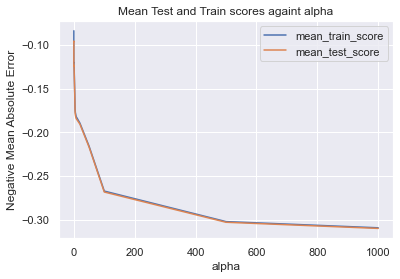

In [73]:
# Plot mean test and train scores against alpha
cv_results2['param_alpha'] = cv_results2['param_alpha'].astype('float64')

# Plotting
plt.plot(cv_results2['param_alpha'], cv_results2['mean_train_score'])
plt.plot(cv_results2['param_alpha'], cv_results2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Mean Test and Train scores againt alpha')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

In [74]:
alpha = 500

lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_lasso_train, y_lasso_train)

Lasso(alpha=500)

In [75]:
lasso2.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.84696671e-06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [76]:
y_pred_train_l2 = lasso2.predict(X_lasso_train)
y_pred_test_l2 = lasso2.predict(X_lasso_test)

In [77]:
lasso_pred2 = pd.DataFrame(y_lasso_train, columns=['y_train'])
lasso_pred2['y_pred_train'] = pd.DataFrame(y_pred_train_l2)
lasso_pred2['y_test'] = pd.DataFrame(y_lasso_test)
lasso_pred2['y_pred_test'] = pd.DataFrame(y_pred_test_l2)
lasso_pred2

,y_train,y_pred_train,y_test,y_pred_test
0,11.492723,11.999002,11.699405,12.015462
1,12.468437,12.019825,12.188418,12.028283
2,11.635143,12.014207,12.078239,12.010010
3,11.669929,11.997577,12.271392,12.016650
4,11.715866,12.026804,12.049419,12.019728
...,...,...,...,...
1017,12.149502,12.011580,NaN,NaN
1018,12.860999,12.215502,NaN,NaN
1019,12.669998,12.009743,NaN,NaN
1020,11.608236,12.022442,NaN,NaN


In [78]:
importance_l2 = np.abs(lasso2.coef_)
feature_names2 = np.array(new_lasso_data.drop(['Id', 'SalePrice', 'TransformedSalePrice'], axis=1).columns)

In [79]:
feature_selected2 = pd.DataFrame(importance_l2, columns=['importance'])
feature_selected2['feature_names'] = pd.DataFrame(feature_names2)
feature_selected2.sort_values('importance', ascending=False).head(5)

,importance,feature_names
3,0.000005,Alley
0,0.000000,MSZoning
47,0.000000,KitchenAbvGr
54,0.000000,GarageCond
53,0.000000,GarageQual


## Thank You